In [1]:
import pandas as pd
import os
from models import *
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

path = './osfstorage-archive/Experiment 1/twostep_data_study1/'
paths = [path + x for x in os.listdir(path) if x.endswith('.csv')]

In [2]:
beta= 8
diff = 0.3  # e,g, if rew prob est 1 is 0.7 and other is 0.4

np.exp(beta * diff) / (1 + np.exp(beta*diff))

0.9168273035060777

In [10]:
#### Get big bar plot
from tqdm import tqdm

# Each element is a list of 4 numbers for that subject, of
# rew com, rew rare, unrew com, unrew rare
subject_mean_stay_probs = []
subject_mean_model_stay_probs = []
beta_stage2 = 8.0
beta_mf0 = 0.0
beta_mf1 = 10.0
beta_stick = 0.0
beta_mb = 0.0
Q_MB_rare_prob = 0.3

for fn in tqdm(paths[:150]):
    df = read_fn(fn)
    df = wrangle_df(df)

    drifts_iterator = (x[1] for x in df.loc[:, ['drift1', 'drift2', 'drift3', 'drift4']].iterrows())
    model = Model(alpha=0.15, beta_stage2=beta_stage2, beta_mf0=beta_mf0, beta_mf1=beta_mf1, beta_stick=beta_stick,
                  beta_mb=beta_mb, Q_MB_rare_prob=Q_MB_rare_prob)

    drifts_iterator = (x[1] for x in df.loc[:, ['drift1', 'drift2', 'drift3', 'drift4']].iterrows())
    outs = model.perform_trials(drifts_iterator, save_Qs=True, save_probs=True, randomise=True)

    df_outs_orig = outs_to_df(outs)
    df_outs = df_outs_orig.iloc[1:, :]

    rew_common = df_outs.prev_rew & df_outs.prev_common_trans
    rew_rare = df_outs.prev_rew & (~df_outs.prev_common_trans)
    unrew_common = (~df_outs.prev_rew) & df_outs.prev_common_trans
    unrew_rare = (~df_outs.prev_rew) & (~df_outs.prev_common_trans)


    trial_stayed = [df_outs.loc[loccer].stay for loccer in [rew_common, rew_rare, unrew_common, unrew_rare]]
    subject_mean_stay_probs.append([np.mean(x) for x in trial_stayed])
    
    df_outs['stay_prob'] = [x.probs1[x.choice1 if x.stay else cbar(x.choice1)] for _, x in \
                            df_outs.loc[:, ['probs1', 'choice1', 'stay']].iterrows()]
    
    subject_mean_model_stay_probs.append([np.mean(df_outs.loc[loccer].stay_prob) \
        for loccer in [rew_common, rew_rare, unrew_common, unrew_rare]])

    model_stay_prob_rew_common = df_outs.loc[df_outs.prev_rew & df_outs.prev_common_trans].stay



  0%|          | 0/150 [00:00<?, ?it/s]/Users/benjidayan/coding/model_free_based/models.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.common_trans = df.common_trans.apply(lambda x: x == 'true')
/Users/benjidayan/coding/model_free_based/models.py:256: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.choice1_int = df.choice1_int.astype(int) - 1
/Users/benjidayan/coding/model_free_based/models.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [11]:
# df_outs.loc[:20, ['choice1', 'stage2', 'choice2', 'reward', 'common_trans', 'prev_rew', 'prev_common_trans']]

Text(0, 0.5, 'P(stay)')

[Text(1, 0, 'prev rewarded'), Text(2, 0, 'prev unrewarded')]

(0.3, 1.0)

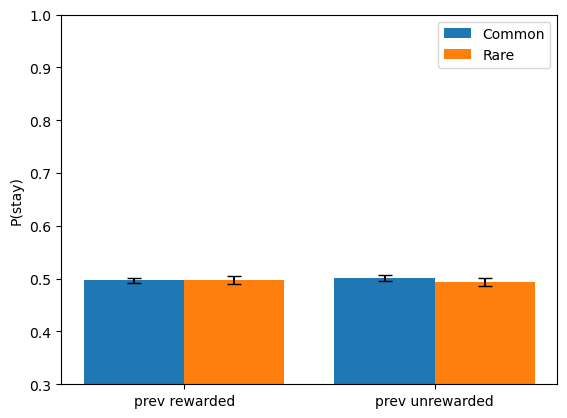

In [12]:
# "stay prob reward common", ...=
sp_rc, sp_rr, sp_uc, sp_ur = zip(*subject_mean_stay_probs)

# Plotting
# n = len(sp_rew_common)

bar_width = 0.4
fig, ax = plt.subplots()
bars1 = ax.bar([0.8, 1.8], [np.mean(sp_rc), np.mean(sp_uc)], bar_width, label='Common', capsize=5,
               yerr=[np.std(sp_rc)/np.sqrt(len(sp_rc)), np.std(sp_uc) / np.sqrt(len(sp_uc))])
bars2 = ax.bar([1.2, 2.2], [np.mean(sp_rr), np.mean(sp_ur)], bar_width, label='Rare', capsize=5,
               yerr=[np.std(sp_rr) / np.sqrt(len(sp_rr)), np.std(sp_ur) / np.sqrt(len(sp_ur))])

# ax.set_xlabel('Reward')
ax.set_ylabel('P(stay)')
# ax.set_title('Experiment 1')
ax.set_xticks([1, 2])
ax.set_xticklabels(['prev rewarded', 'prev unrewarded'])

# set y axes limits
ax.set_ylim([0.3, 1.0])

plt.legend()

Text(0, 0.5, 'P(stay)')

[Text(1, 0, 'prev rewarded'), Text(2, 0, 'prev unrewarded')]

(0.3, 1.0)

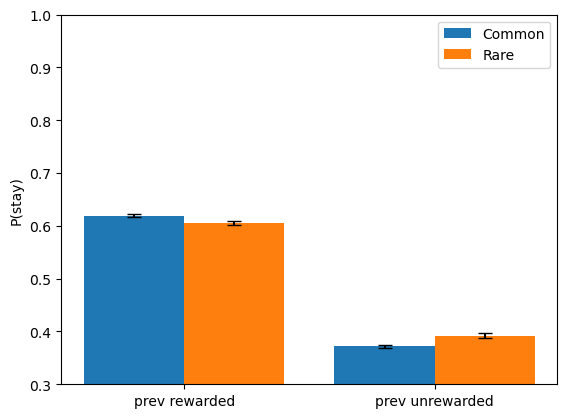

In [14]:
# "stay prob reward common", ...=
sp_rc, sp_rr, sp_uc, sp_ur = zip(*subject_mean_model_stay_probs)

# Plotting
# n = len(sp_rew_common)

bar_width = 0.4
fig, ax = plt.subplots()
bars1 = ax.bar([0.8, 1.8], [np.mean(sp_rc), np.mean(sp_uc)], bar_width, label='Common', capsize=5,
               yerr=[np.std(sp_rc)/np.sqrt(len(sp_rc)), np.std(sp_uc) / np.sqrt(len(sp_uc))])
bars2 = ax.bar([1.2, 2.2], [np.mean(sp_rr), np.mean(sp_ur)], bar_width, label='Rare', capsize=5,
               yerr=[np.std(sp_rr) / np.sqrt(len(sp_rr)), np.std(sp_ur) / np.sqrt(len(sp_ur))])

# ax.set_xlabel('Reward')
ax.set_ylabel('P(stay)')
# ax.set_title('Experiment 1')
ax.set_xticks([1, 2])
ax.set_xticklabels(['prev rewarded', 'prev unrewarded'])

# set y axes limits
ax.set_ylim([0.3, 1.0])

plt.legend()

In [99]:
rew_common.sum()
rew_rare.sum()
unrew_common.sum()
unrew_rare.sum()

63

38

59

198

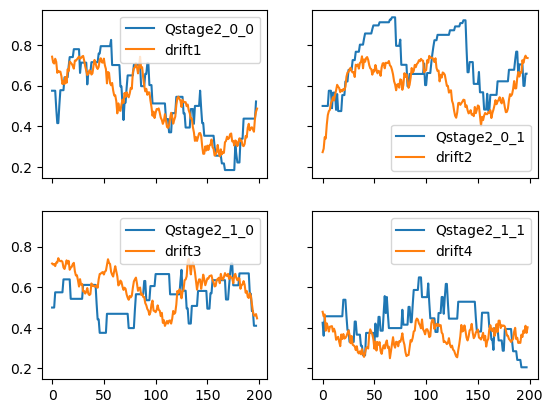

In [77]:
qstage2_arr = np.stack(df_outs.Qstage2)
qstage2_plot(qstage2_arr, df)


In [93]:
mean_mean_rew = []
for _ in range(40):

    drifts_iterator = (x[1] for x in df.loc[:, ['drift1', 'drift2', 'drift3', 'drift4']].iterrows())
    model = Model(alpha=0.15, beta_stage2=beta_stage2, beta_mf0=beta_mf0, beta_mf1=beta_mf1, beta_stick=beta_stick,
                    beta_mb=beta_mb, Q_MB_rare_prob=Q_MB_rare_prob)

    drifts_iterator = (x[1] for x in df.loc[:, ['drift1', 'drift2', 'drift3', 'drift4']].iterrows())
    outs = model.perform_trials(drifts_iterator, save_Qs=True, save_probs=True, randomise=True)

    df_outs_orig = outs_to_df(outs)
    df_outs = df_outs_orig.iloc[1:, :]

    rew_common = df_outs.prev_rew & df_outs.prev_common_trans
    rew_rare = df_outs.prev_rew & ~df_outs.prev_common_trans
    unrew_common = ~df_outs.prev_rew & df_outs.prev_common_trans
    unrew_rare = ~df_outs.prev_rew & ~df_outs.prev_common_trans

    mean_rew = df_outs.reward.mean()
    mean_mean_rew.append(mean_rew)

np.mean(mean_mean_rew)
np.std(mean_mean_rew)
df.loc[:, ['drift1', 'drift2', 'drift3', 'drift4']].mean().mean()

0.5266414141414142

0.041014757846263496

0.5184085461316721

In [56]:
# stderr of mean = stdeviation / sqrt(n)
# TODO figure out prev unrewarded

In [57]:
# fn = paths[0]
# df = read_fn(fn)
# df = wrangle_df(df)

# drifts_iterator = (x[1] for x in df.loc[:, ['drift1', 'drift2', 'drift3', 'drift4']].iterrows())
# model = Model(alpha=0.15, beta_mf0=0.1, beta_mf1=0.1, beta_stick=0.1, beta_mb=1.0)

# drifts_iterator = (x[1] for x in df.loc[:, ['drift1', 'drift2', 'drift3', 'drift4']].iterrows())
# outs = model.perform_trials(drifts_iterator, save_Qs=True)

# df_outs = outs_to_df(outs)
# df_outs

In [46]:
model2 = Model(alpha=0.15, beta_stage2=beta_stage2, beta_mf0=beta_mf0, beta_mf1=beta_mf1, beta_stick=beta_stick,
                  beta_mb=beta_mb, Q_MB_rare_prob=Q_MB_rare_prob)
stage1_probs = []
stage2_probs = []
prev_choice = None
for i, row in df_outs_orig.iterrows():
    model2.Qstage2.Q = row.Qstage2
    model2.Q_MF0.Q = row.Q_MF0
    model2.Q_MF1.Q = row.Q_MF1
    stage1_probs.append(model2.get_stage1_action(prev_choice1=prev_choice, return_probs=True))
    stage2_probs.append(np.array([model2.get_stage2_action(0, return_probs=True), model2.get_stage2_action(1, return_probs=True)]))
    prev_choice = row.choice1




In [47]:
df_outs_orig['stage1_probs'] = stage1_probs
df_outs_orig['stage2_probs'] = stage2_probs

In [48]:
np.set_printoptions(precision=3)

In [49]:
def round_array(arr):
    return np.round(arr, 3)

df_outs_orig_rounded = df_outs_orig.copy()
for col in df_outs_orig.columns:
    if df_outs_orig[col][0].__class__ == np.ndarray:
        df_outs_orig_rounded[col] = df_outs_orig[col].apply(round_array)

In [53]:
df_outs_orig_rounded.loc[:20, ['choice1', 'stage2', 'choice2', 'reward', 'common_trans', 'stage1_probs', 'stage2_probs', 'Qstage2', 'Q_MB']]

,choice1,stage2,choice2,reward,common_trans,stage1_probs,stage2_probs,Qstage2,Q_MB
0,0,1,1,1,False,"[0.321, 0.679]","[[0.5, 0.5], [0.321, 0.679]]","[[0.5, 0.5], [0.5, 0.575]]","[0.5, 0.575]"
1,1,0,0,1,False,"[0.5, 0.5]","[[0.679, 0.321], [0.321, 0.679]]","[[0.575, 0.5], [0.5, 0.575]]","[0.575, 0.575]"
2,0,0,1,1,True,"[0.5, 0.5]","[[0.5, 0.5], [0.321, 0.679]]","[[0.575, 0.575], [0.5, 0.575]]","[0.575, 0.575]"
3,0,0,1,0,True,"[0.5, 0.5]","[[0.703, 0.297], [0.321, 0.679]]","[[0.575, 0.489], [0.5, 0.575]]","[0.575, 0.575]"
4,0,0,1,0,True,"[0.5, 0.5]","[[0.831, 0.169], [0.321, 0.679]]","[[0.575, 0.415], [0.5, 0.575]]","[0.575, 0.575]"
5,0,1,0,0,False,"[0.5, 0.5]","[[0.831, 0.169], [0.182, 0.818]]","[[0.575, 0.415], [0.425, 0.575]]","[0.575, 0.575]"
6,0,0,0,1,True,"[0.654, 0.346]","[[0.903, 0.097], [0.182, 0.818]]","[[0.639, 0.415], [0.425, 0.575]]","[0.639, 0.575]"
7,1,1,1,0,True,"[0.818, 0.182]","[[0.903, 0.097], [0.346, 0.654]]","[[0.639, 0.415], [0.425, 0.489]]","[0.639, 0.489]"
8,1,1,0,0,True,"[0.818, 0.182]","[[0.903, 0.097], [0.218, 0.782]]","[[0.639, 0.415], [0.361, 0.489]]","[0.639, 0.489]"
9,1,1,0,1,True,"[0.818, 0.182]","[[0.903, 0.097], [0.421, 0.579]]","[[0.639, 0.415], [0.457, 0.489]]","[0.639, 0.489]"


In [29]:
row = df_outs_orig.iloc[1]
model2.Qstage2.Q = row.Qstage2
model2.Q_MF0.Q = row.Q_MF0
model2.Q_MF1.Q = row.Q_MF1

In [33]:
row

choice1                                                              1
stage2                                                               0
choice2                                                              0
reward                                                               1
Qstage2                                   [[0.575, 0.5], [0.5, 0.575]]
Q_MB                                                    [0.575, 0.575]
Q_MF0                                        [0.5, 0.5208124999999999]
Q_MF1                                        [0.5, 0.6387499999999999]
stay                                                              True
prev_rew                                                          True
common_trans                                                     False
prev_common_trans                                                 True
stage1_probs                 [0.39748478776030544, 0.6025152122396946]
stage2_probs         [[0.7549149868676283, 0.24508501313237172], [0...
Name: 

In [40]:
model2.get_stage1_action(prev_choice1=None, return_probs=True)

array([0.496, 0.504])

In [43]:
self = model2
prev_choice1=1
beta_scaled_qs = np.array(
[
    [Q.get_beta_scaled_val(choice) for Q in [self.Q_MB, self.Q_MF0, self.Q_MF1]]
        + [self.beta_stick if choice == prev_choice1 else 0]
    for choice in [0, 1]
])
beta_scaled_qs

array([[2.875, 0.05 , 0.05 , 0.   ],
       [2.875, 0.052, 0.064, 0.4  ]])

In [16]:
df_outs_orig.loc[8:13, ['choice1', 'stage2', 'choice2', 'reward', 'common_trans', 'Qstage2', 'Q_MB']]

,choice1,stage2,choice2,reward,common_trans,Qstage2,Q_MB
8,1,1,0,1,True,"[[0.5, 0.5], [0.7610633026396484, 0.5]]","[0.5, 0.7610633026396484]"
9,1,0,1,1,False,"[[0.5, 0.575], [0.7610633026396484, 0.5]]","[0.575, 0.7610633026396484]"
10,1,1,0,1,True,"[[0.5, 0.575], [0.7969038072437011, 0.5]]","[0.575, 0.7969038072437011]"
11,1,1,0,0,True,"[[0.5, 0.575], [0.6773682361571459, 0.5]]","[0.575, 0.6773682361571459]"
12,1,0,1,0,False,"[[0.5, 0.48874999999999996], [0.67736823615714...","[0.5, 0.6773682361571459]"
13,1,1,0,1,True,"[[0.5, 0.48874999999999996], [0.72576300073357...","[0.5, 0.725763000733574]"


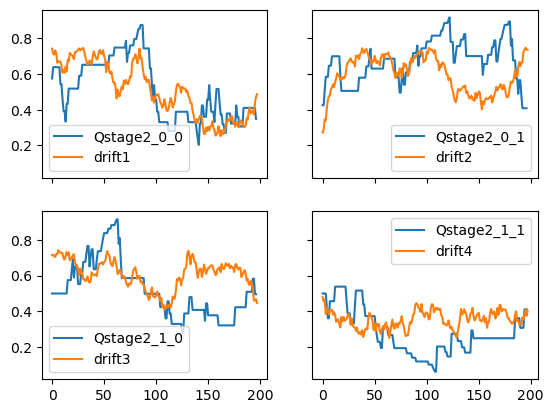

In [25]:
qstage2_arr = np.stack(df_outs.Qstage2)
qstage2_plot(qstage2_arr, df)


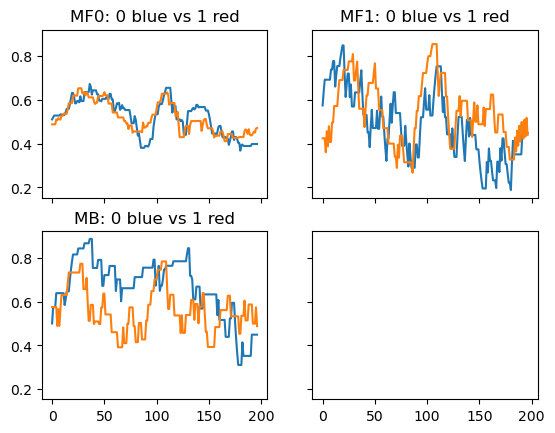

In [18]:
qstage1_plot(df_outs)

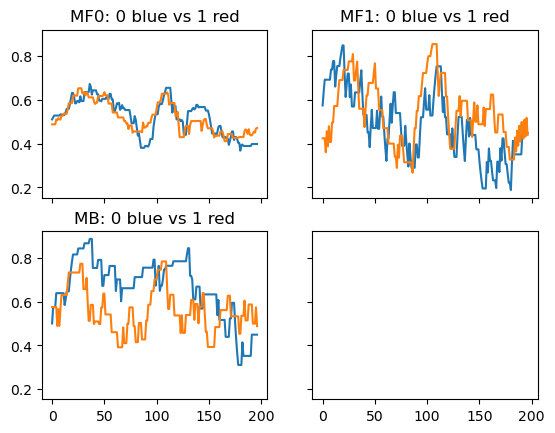

In [19]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

q_mf0_arr = np.stack(df_outs.Q_MF0)
_ = axes[0][0].plot(q_mf0_arr[:, 0], label='q_mf0_0')
_ = axes[0][0].plot(q_mf0_arr[:, 1], label='q_mf0_1')

q_mf1_arr = np.stack(df_outs.Q_MF1)
_ = axes[0][1].plot(q_mf1_arr[:, 0], label='q_mf1_0')
_ = axes[0][1].plot(q_mf1_arr[:, 1], label='q_mf1_1')

q_mb_arr = np.stack(df_outs.Q_MB)
_ = axes[1][0].plot(q_mb_arr[:, 0], label='q_mb_0')
_ = axes[1][0].plot(q_mb_arr[:, 1], label='q_mb_1')

_ = axes[0][0].set_title('MF0: 0 blue vs 1 red')
_ = axes[0][1].set_title('MF1: 0 blue vs 1 red')
_ = axes[1][0].set_title('MB: 0 blue vs 1 red')
